# Calibration in wavelength of the  spectra for HD111980 data 09 jun 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date : 9th October 2017
- update   : 11th October 2017



- calibrate in wavelength
- Compute uncentainty

In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [2]:
print theNotebook

CalibrateSpectrum


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

CalibrateSpectrum
ccdproc version 1.3.0.post1
bottleneck version 1.3.2
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_09jun17/HD111980


In [4]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")


Bad key "axes.color_cycle" on line 215 in
../../templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
matplotlib.rcParams.update({'font.size': 22})

In [6]:
import pandas as pd

# Initialization

## Input Directory

In [7]:
inputdir="./spectrum_fitsspec"
MIN_IMGNUMBER=4
MAX_IMGNUMBER=28
date="20170609"
object_name='HD111980'
tag = "finalSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [8]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./spectrum_calibspec"
ensure_dir(outputdir)

# Open files

## Find where is order 0 in original raw image

- necessary for wavelength calibration

In [9]:
df=pd.read_csv('xy_pointing.csv')
x_star=df["x_pointing"]
y_star=df["y_pointing"]
all_theta=df["theta"]
x_pointing=x_star
y_pointing=y_star

In [10]:
order0_positions = np.array([x_pointing,y_pointing]).T

In [11]:
df.head()

,Unnamed: 0,theta,x_pointing,y_pointing
0,0,-0.511132,335.448097,343.053556
1,1,-0.339621,1007.084739,341.484256
2,2,-0.111469,1342.833047,341.122682
3,3,-0.312795,686.097705,676.418313
4,4,-0.165841,1342.206613,675.905141


# Open Spectra fits file

In [12]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [13]:
all_dates,all_airmass,all_titles,all_header,all_expo,all_leftspectra,all_rightspectra,all_totleftspectra,all_totrightspectra,all_filt,all_filt1,all_filt2,all_elecgain=BuildRawSpec(sorted_files,sorted_numbers,object_name)

In [14]:
print all_filt

['FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400']


# Disperser sorting

In [15]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [16]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [0 1 2 3 4 5]
dia Thor300  	 : filt1_idx ::  []
dia HoloPhP  	 : filt2_idx ::  []
dia HoloPhAg  	 : filt3_idx ::  []
dia HoloAmAg  	 : filt4_idx ::  []
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


# Show Raw Spectra
-----------------------

In [17]:
len(all_rightspectra)

6

/Users/dagoret/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


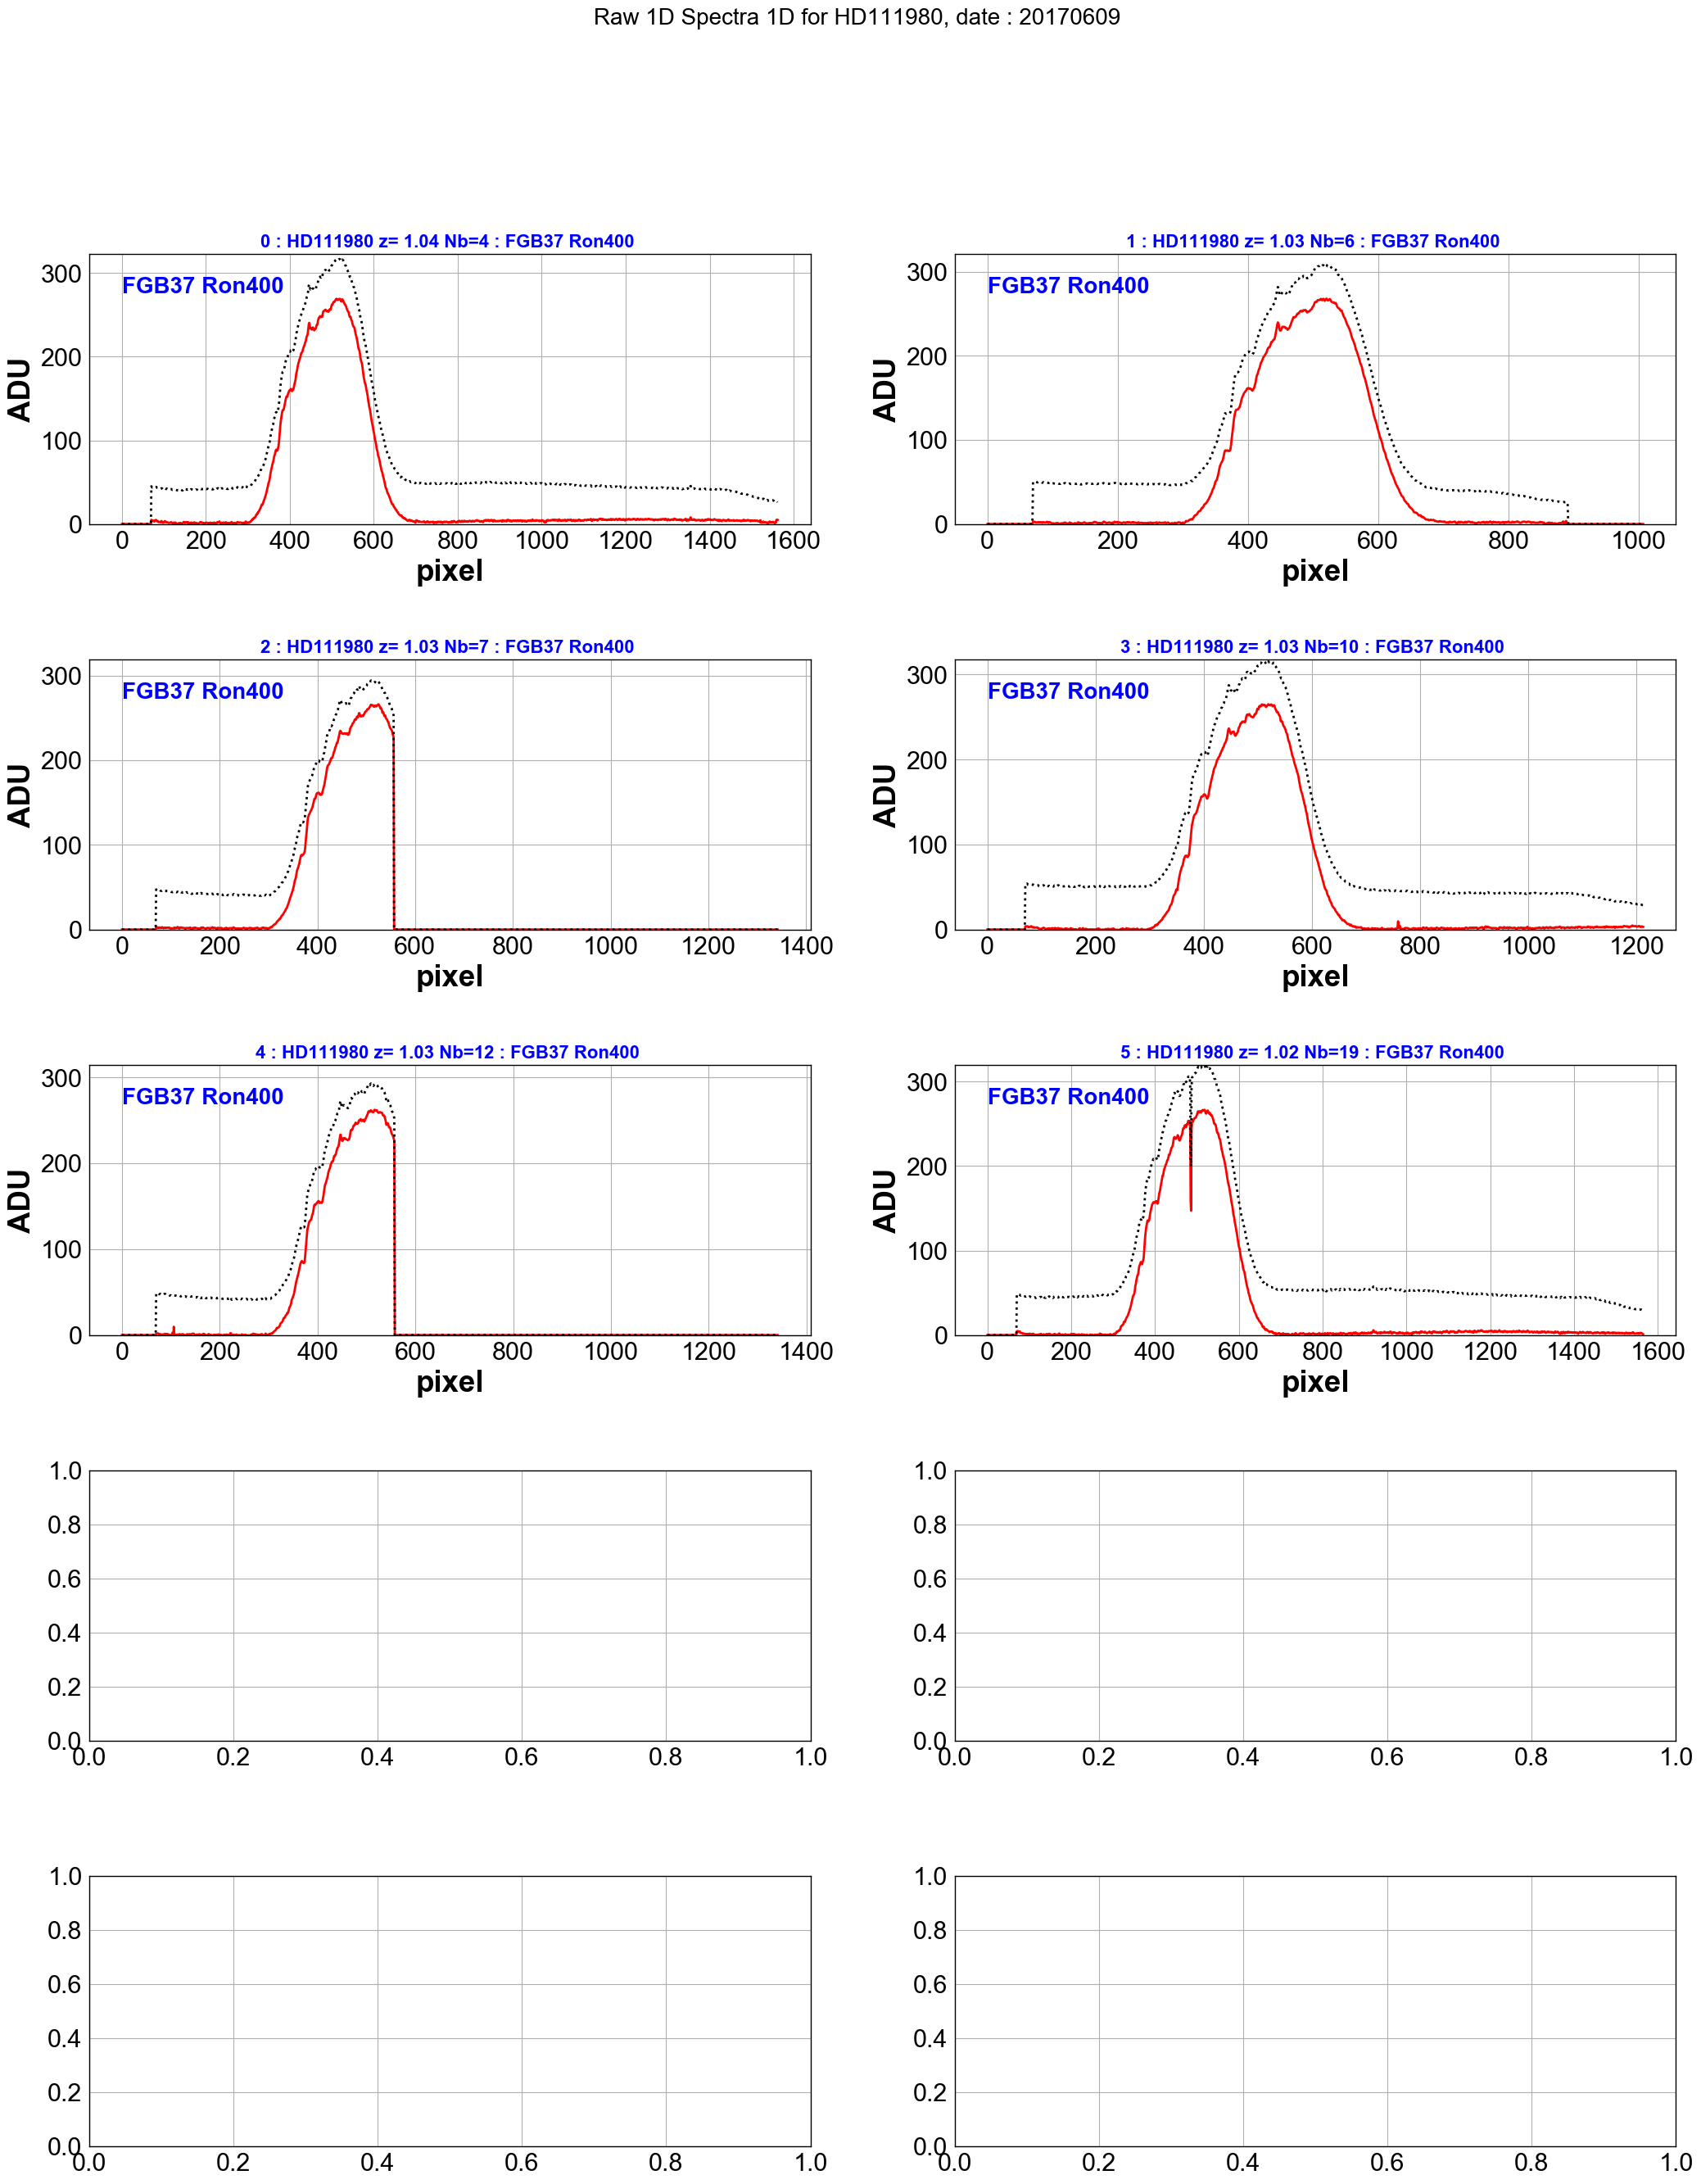

In [18]:
ShowExtrSpectrainPDF(all_rightspectra,all_totrightspectra,all_titles,object_name,dir_top_images,all_filt,date,'raw1Dspectra_right.pdf')

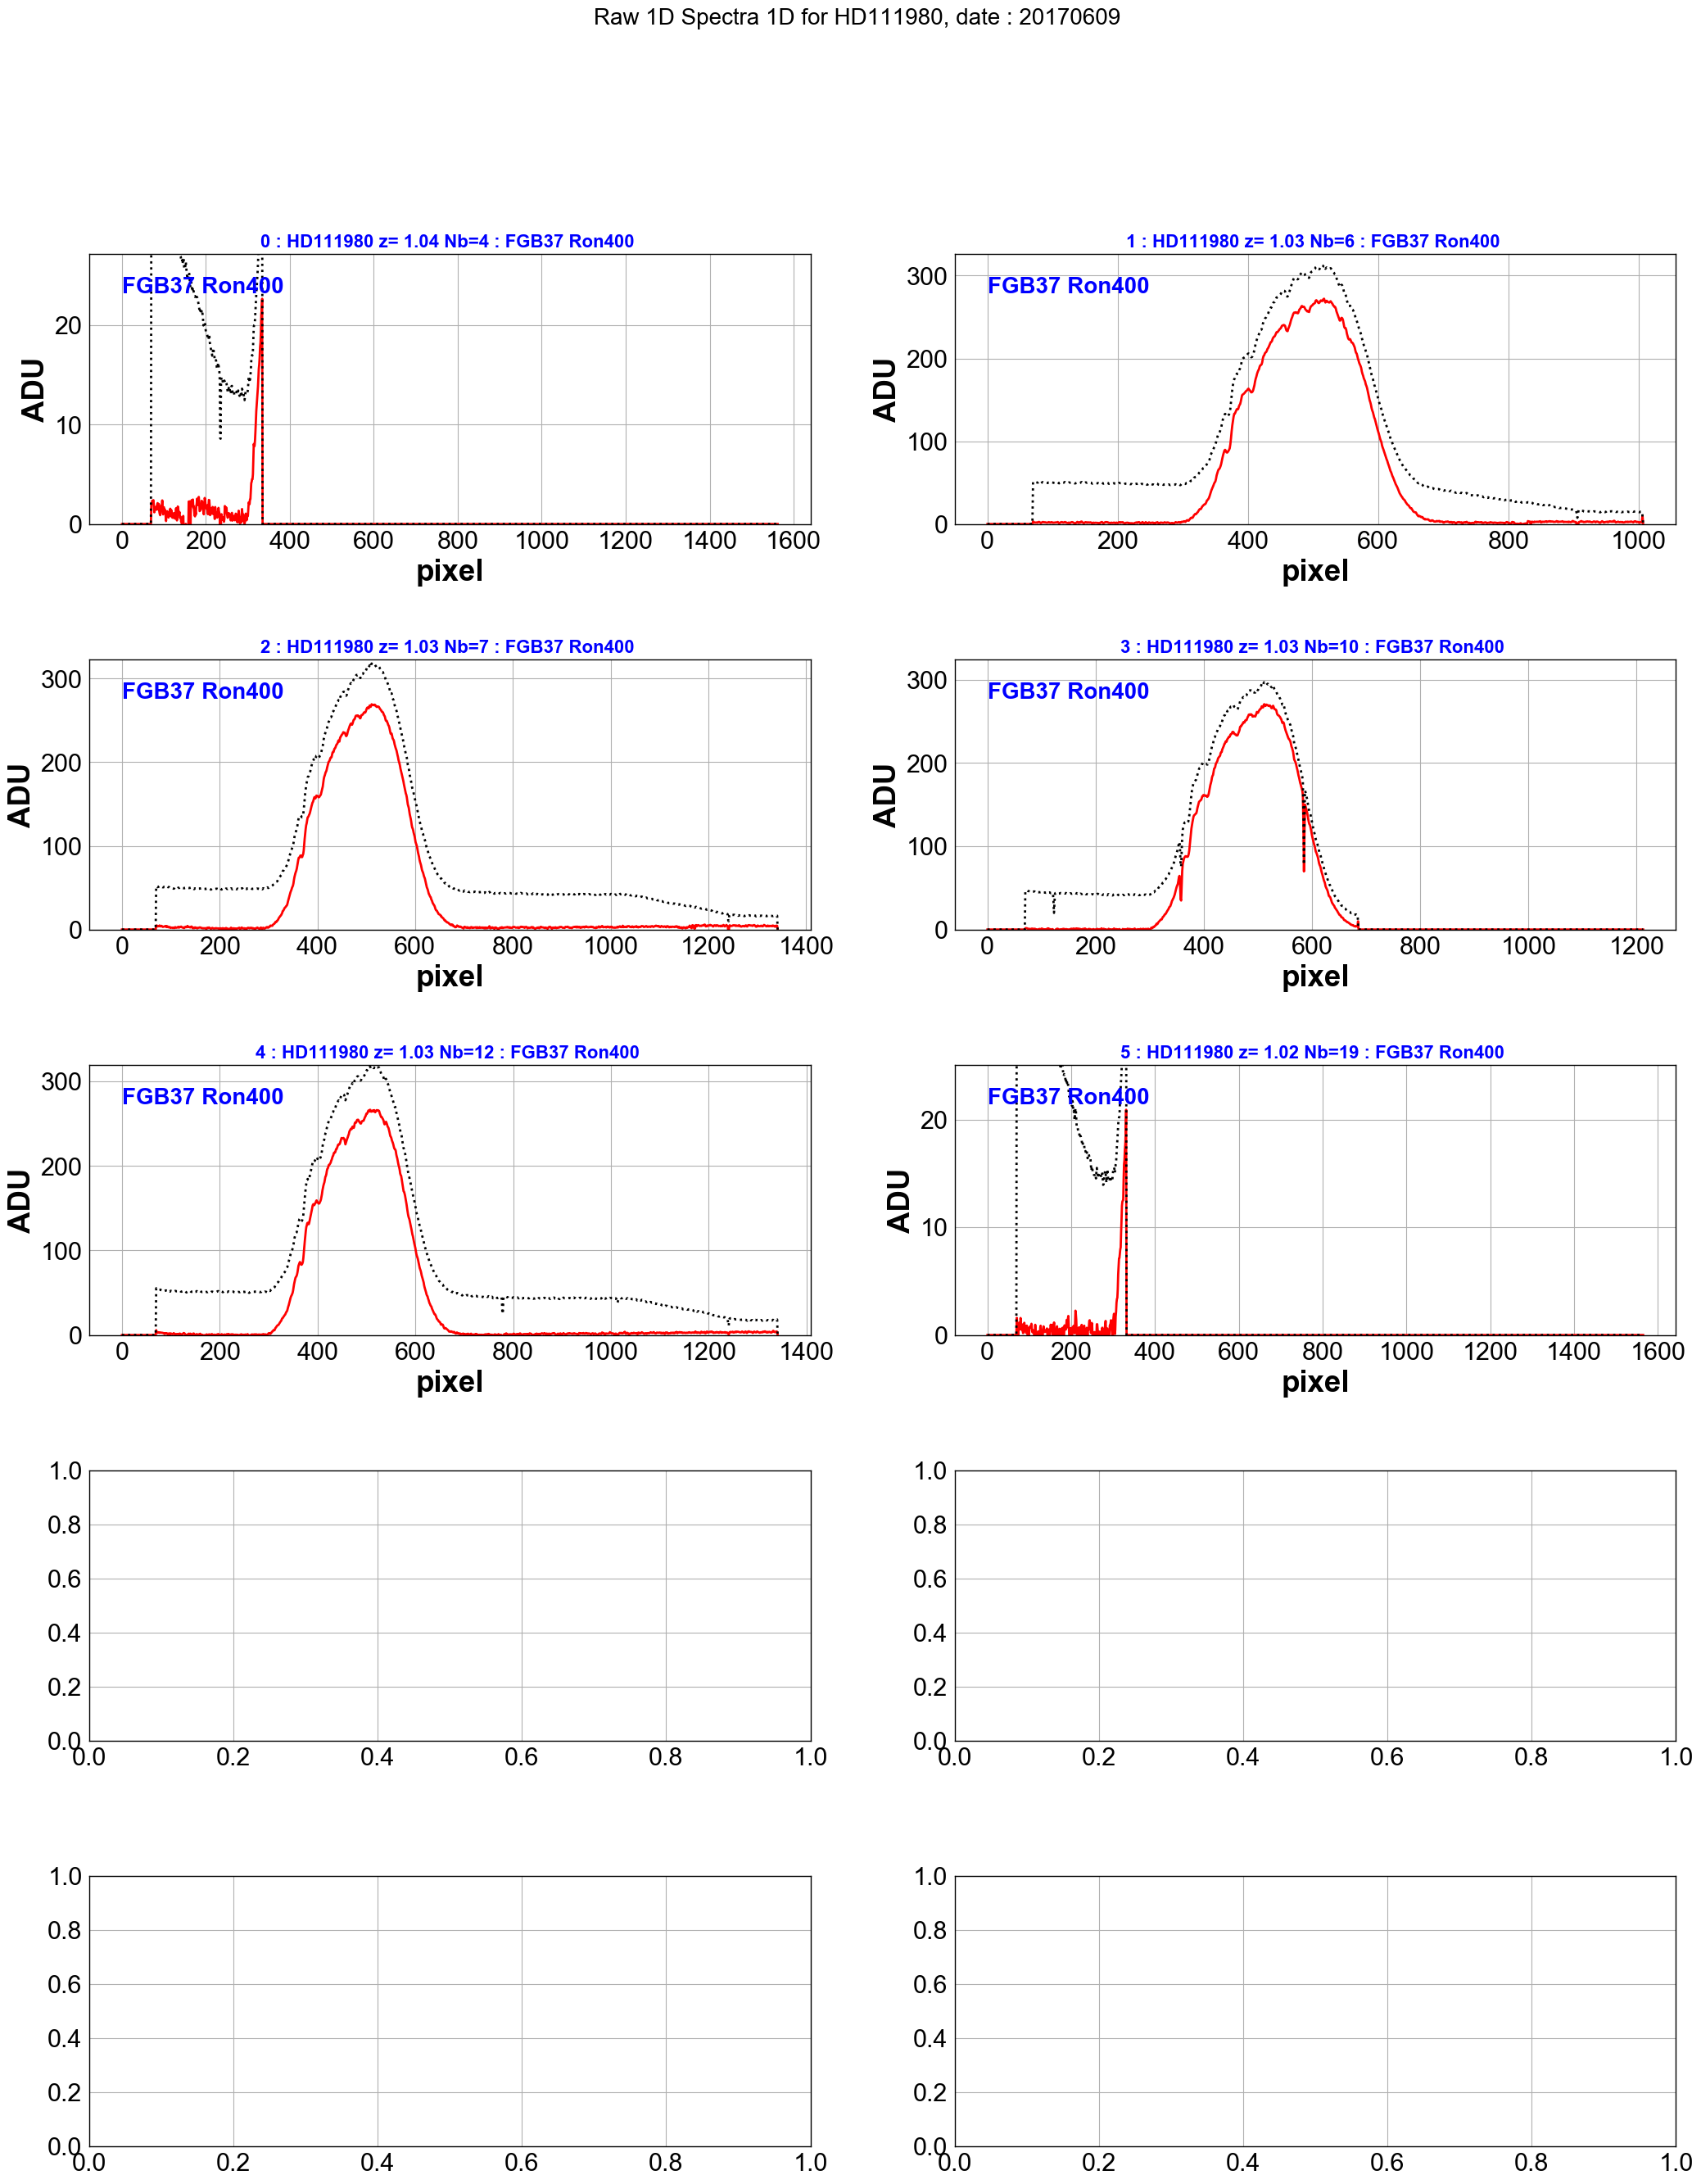

In [19]:
 ShowExtrSpectrainPDF(all_leftspectra,all_totleftspectra,all_titles,object_name,dir_top_images,all_filt,date,'raw1Dspectra_left.pdf')

# Calibrate in wavelength

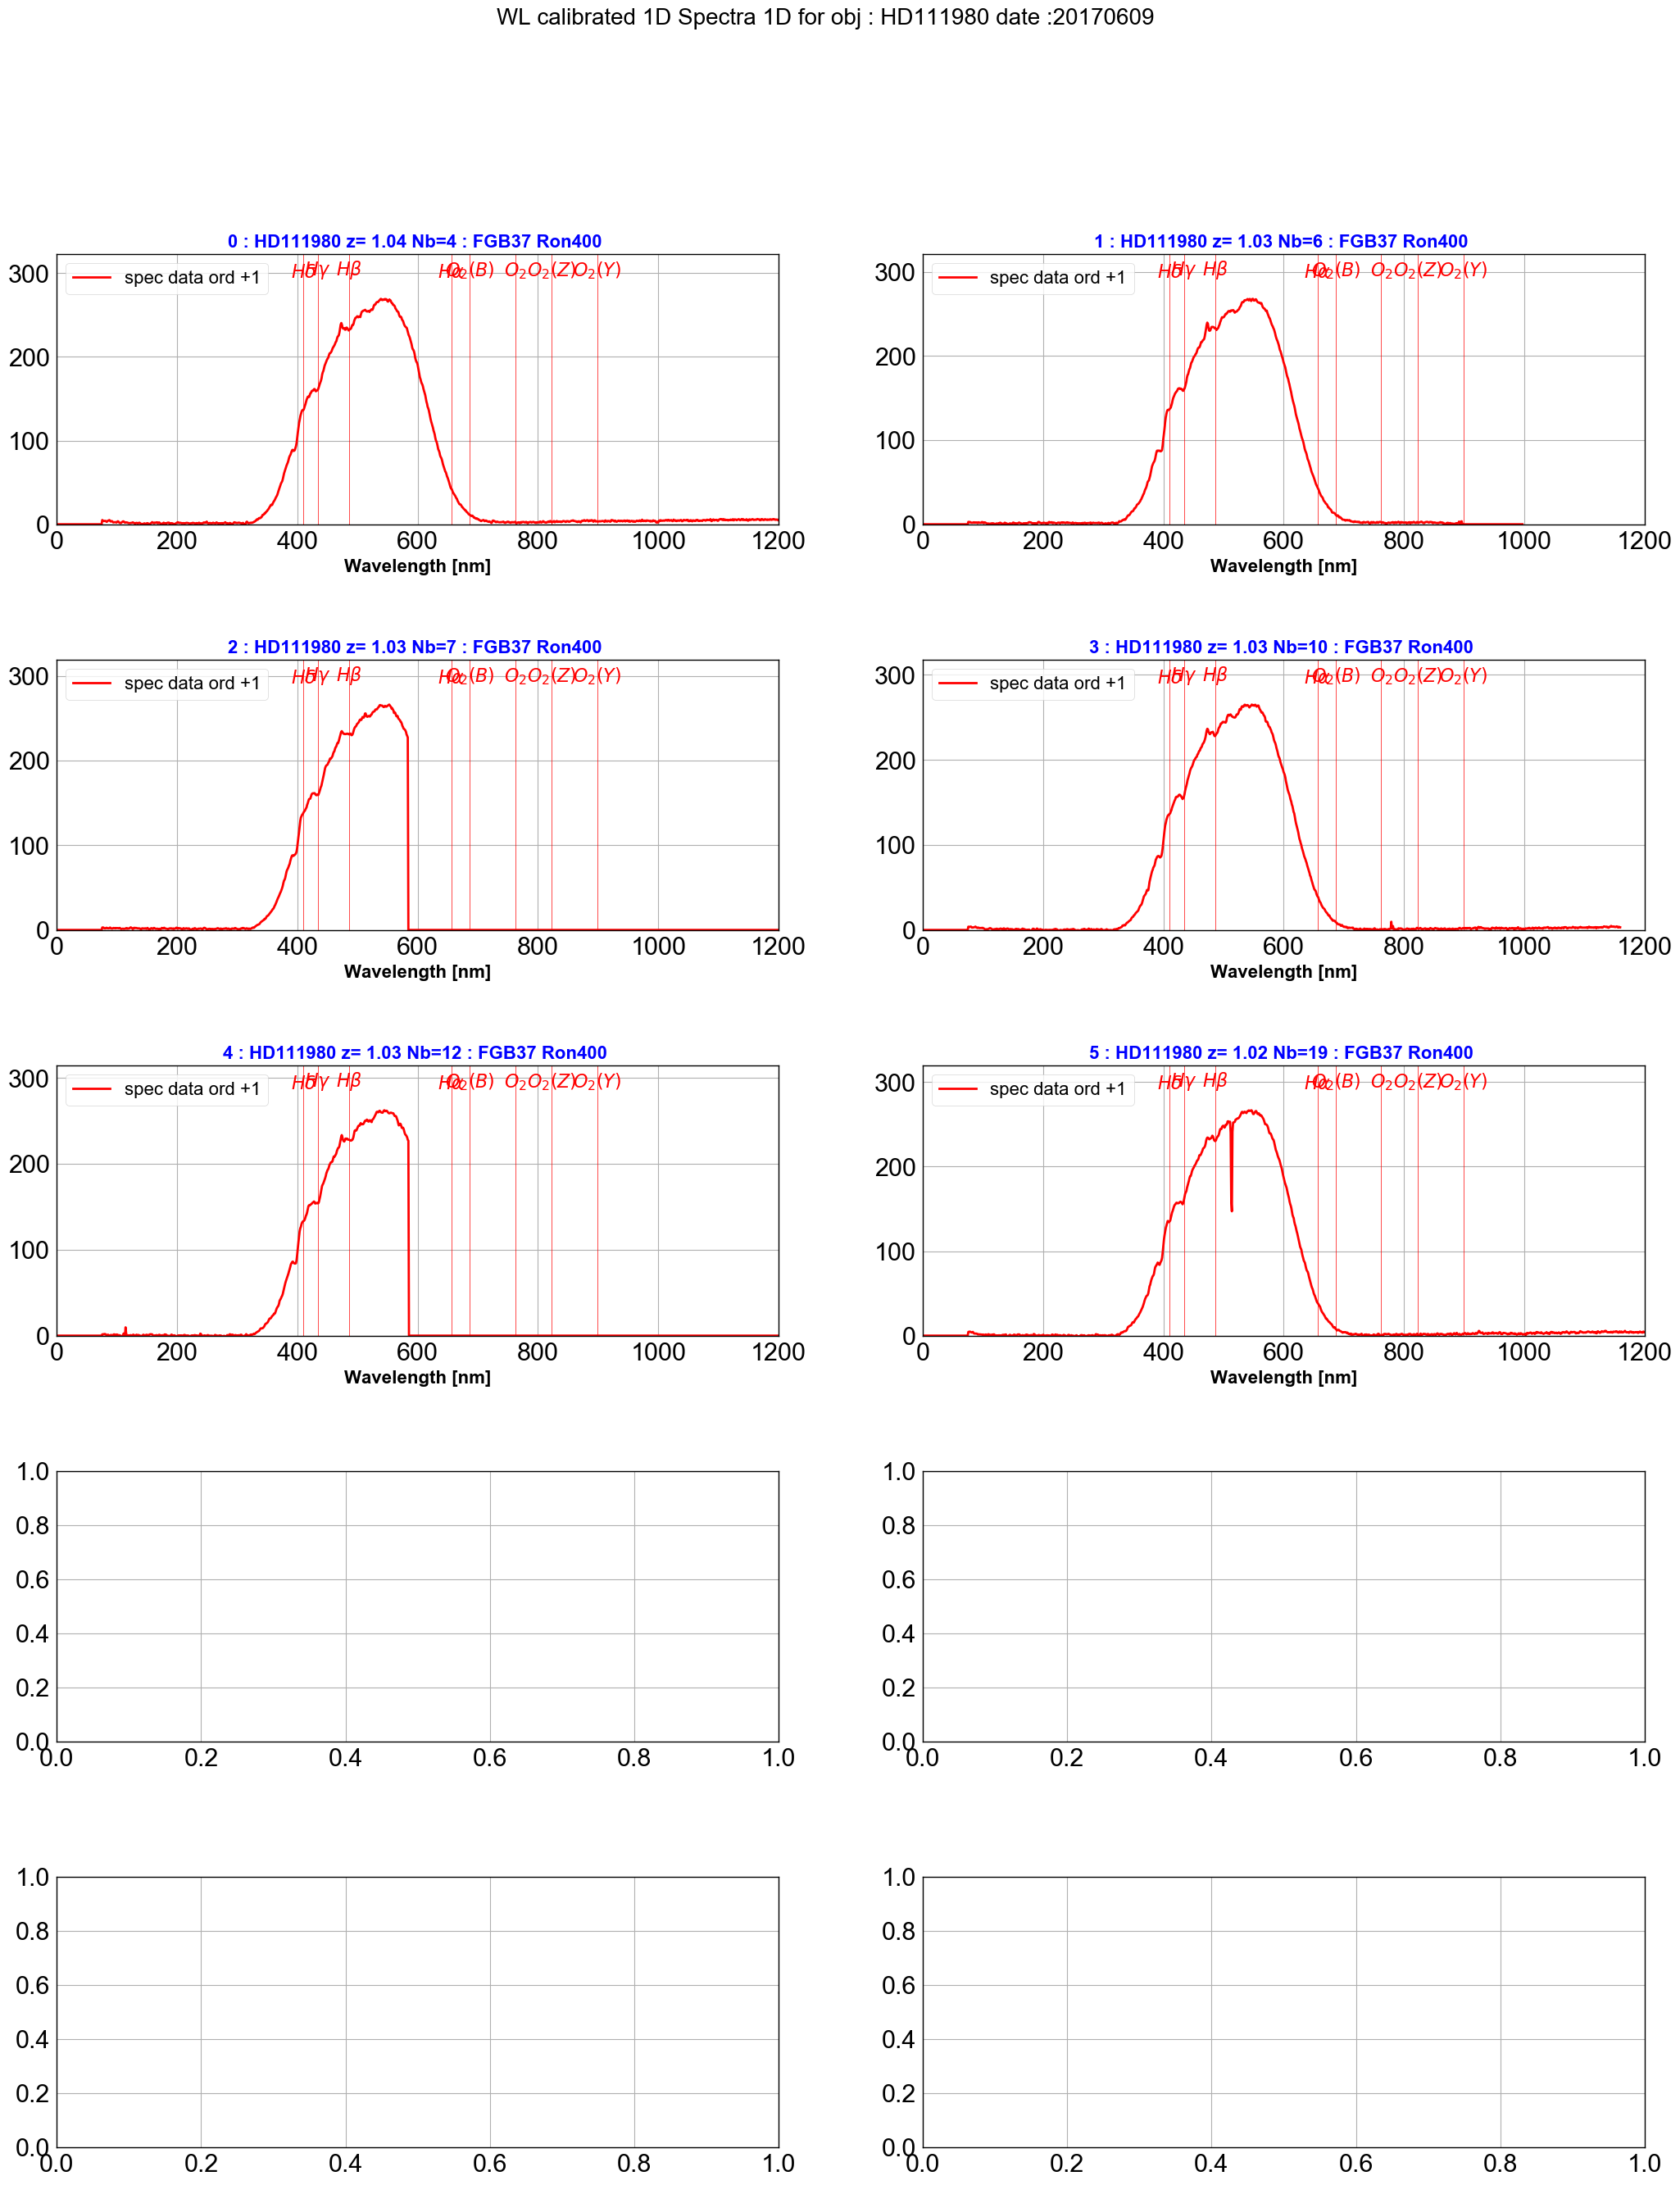

In [20]:
all_wl_right=CALSPECAbsLineIdentificationinPDF(all_rightspectra,order0_positions,all_titles,object_name,dir_top_images,all_filt,date,'CALSPEC_rightspectrum.pdf','spec data ord +1')

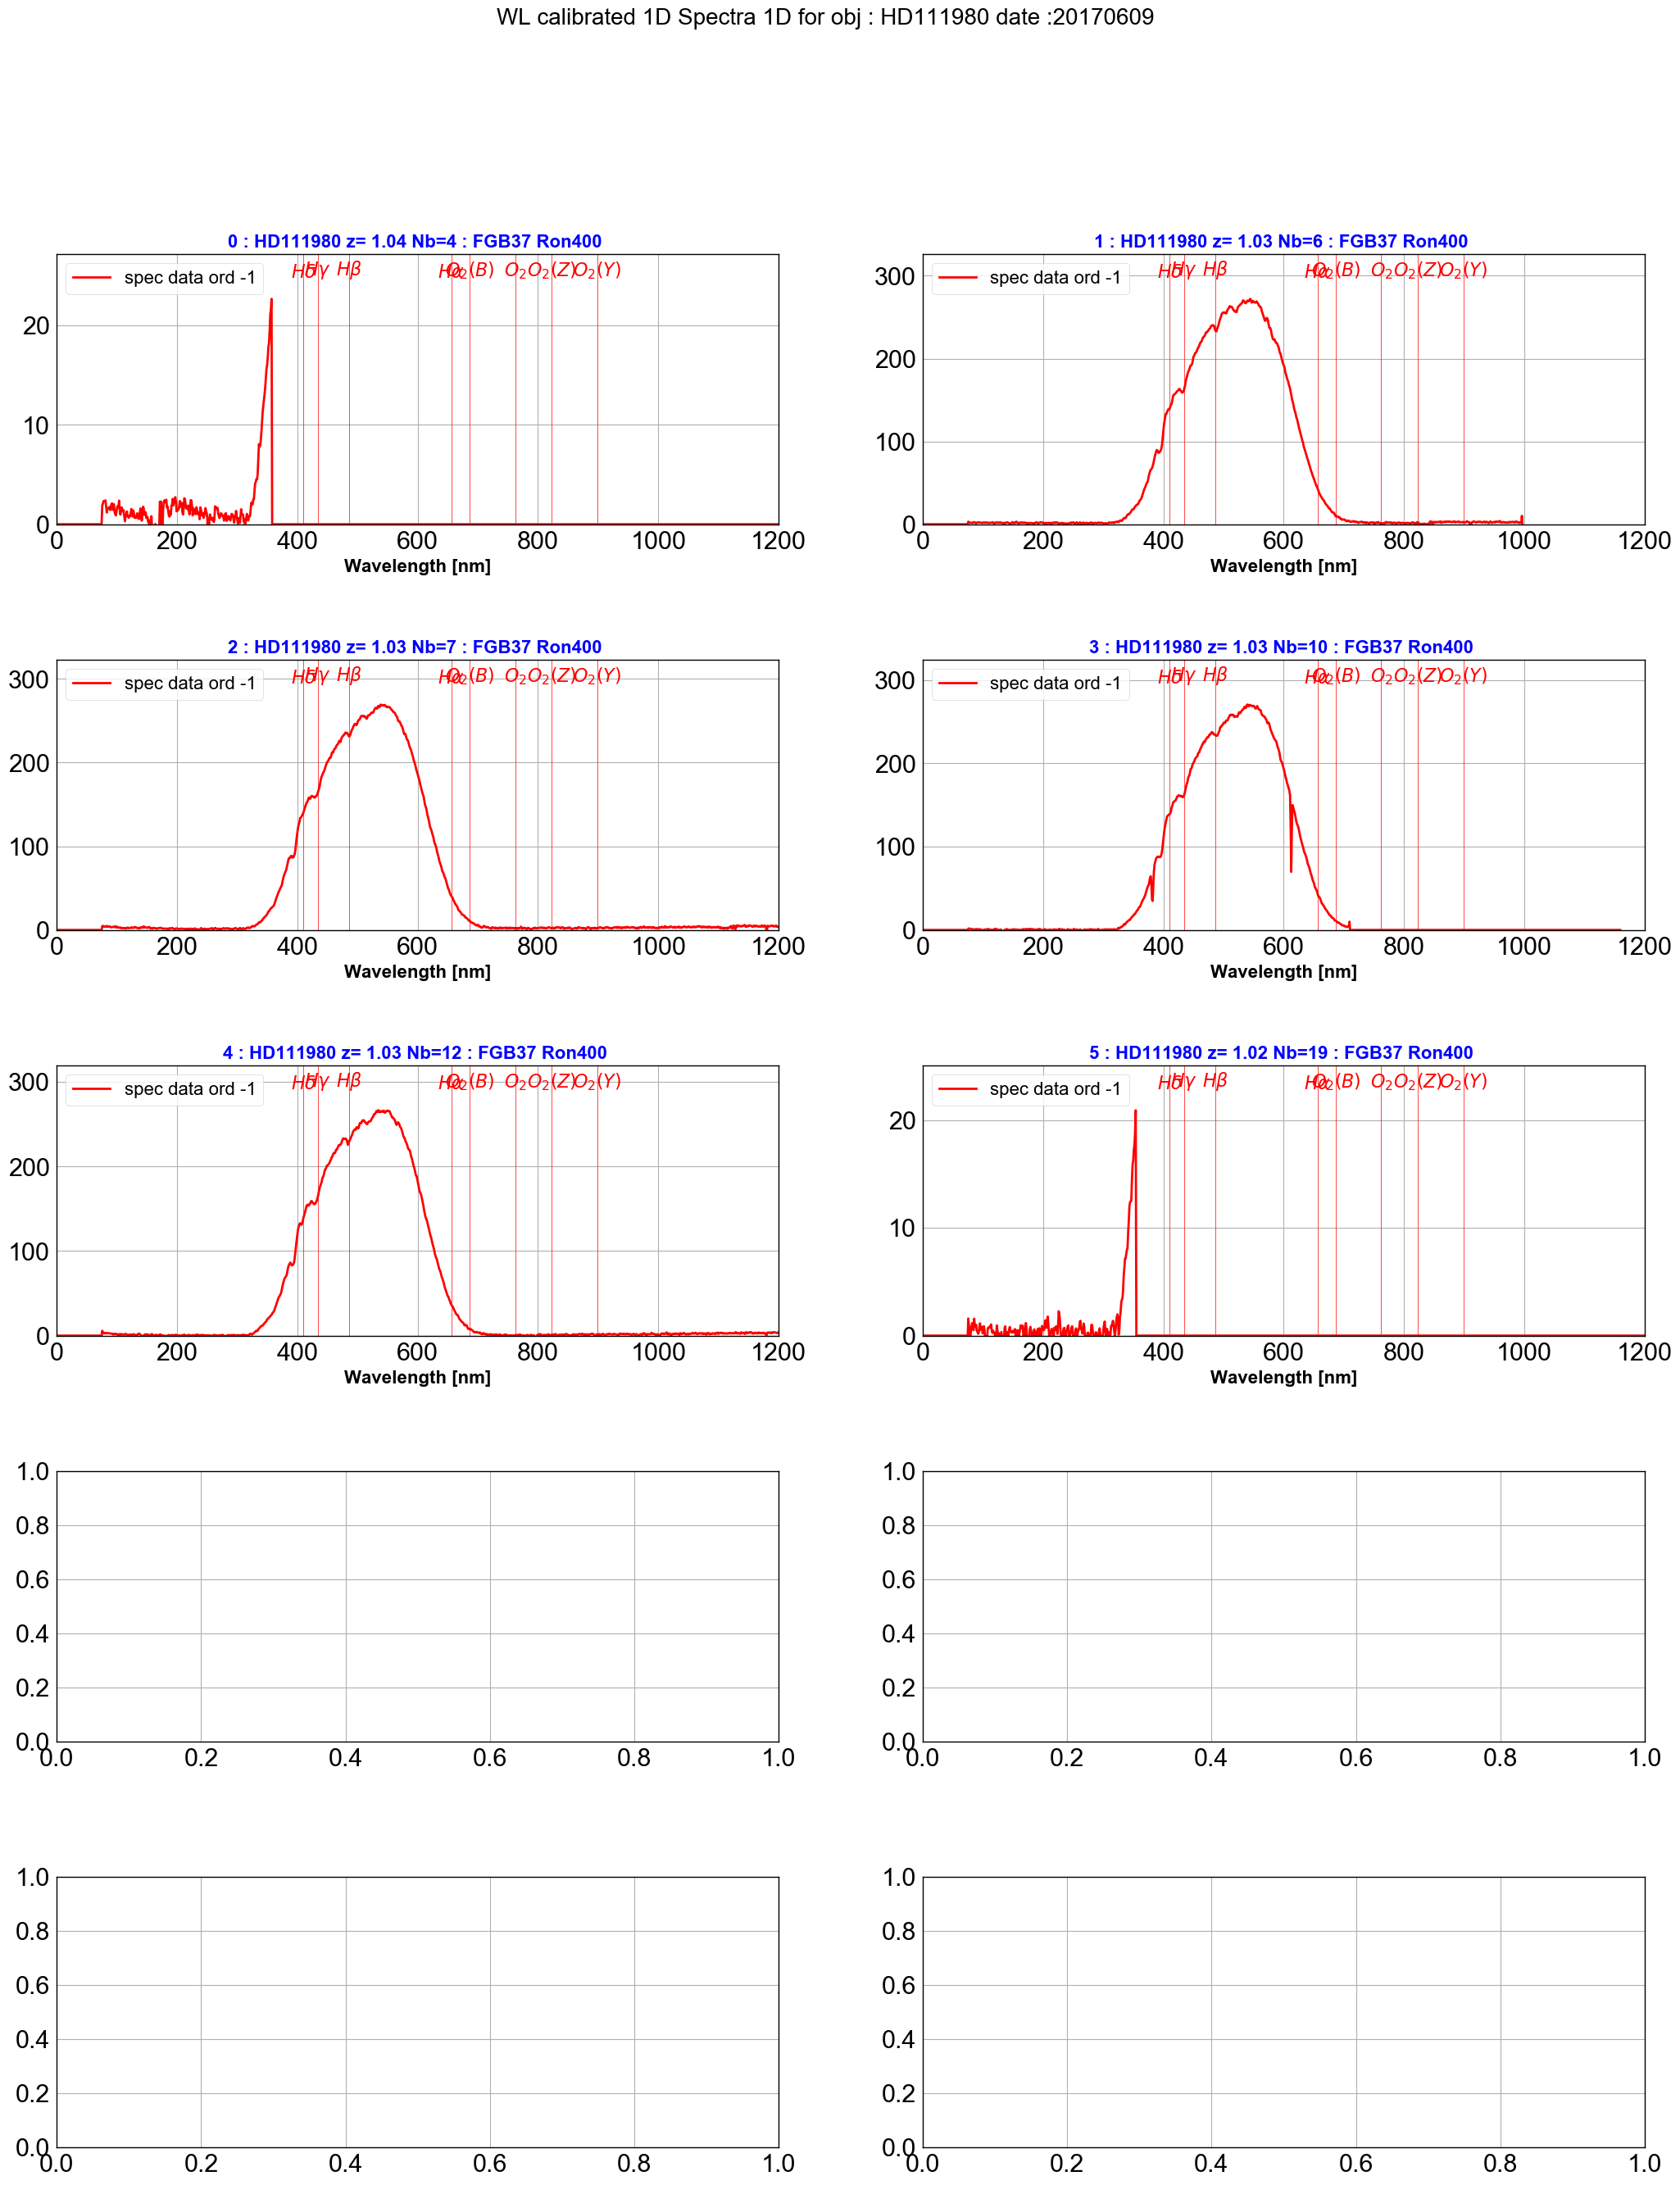

In [21]:
all_wl_left=CALSPECAbsLineIdentificationinPDF(all_leftspectra,order0_positions,all_titles,object_name,dir_top_images,all_filt,date,'CALSPEC_leftspectrum.pdf','spec data ord -1')

## Compare spectra

In [22]:
def CompareSpectrumProfile(wl,spectra,all_titles,object_name,all_filt,dir_top_img,grating_name,list_of_index):
    """
    CompareSpectrumProfile
    =====================
    
    """
    shortfilename='CompareSpec_'+grating_name+'.pdf'
    title="Compare spectra of {} with disperser {}".format(object_name,grating_name)
    figfilename=os.path.join(dir_top_img,shortfilename)
    pp = PdfPages(figfilename) # create a pdf file
    
    
    f, axarr = plt.subplots(1,1,figsize=(10,6))
    f.suptitle(title,fontsize=16,fontweight='bold')
    
    NBSPEC=len(spectra)
    
    min_z=min(all_airmass)
    max_z=max(all_airmass)
    
    maxim_y_to_plot= []

    texte='airmass : {} - {} '.format(min_z,max_z)
    
    for index in np.arange(0,NBSPEC):
                
        if index in list_of_index:
            axarr.plot(wl[index],spectra[index],'-',lw=3)
            maxim_y_to_plot.append(spectra[index].max())
    
    max_y_to_plot=max(maxim_y_to_plot)
    axarr.set_ylim(0,max_y_to_plot)
    axarr.text(0.,max_y_to_plot*0.9, texte ,verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)
    axarr.grid(True)
    
    #axarr.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #axarr.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axarr.grid(b=True, which='major', color='grey', linewidth=0.5)
    #axarr.grid(b=True, which='minor', color='grey', linewidth=0.5)

    
    
    axarr.set_xlabel("wavelength (nm)",fontsize=25,fontweight='bold')
    axarr.set_xlim(0.,1200.)
        
    f.savefig(pp, format='pdf')
    f.show()
    
    pp.close()     
    

In [23]:
import matplotlib 
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

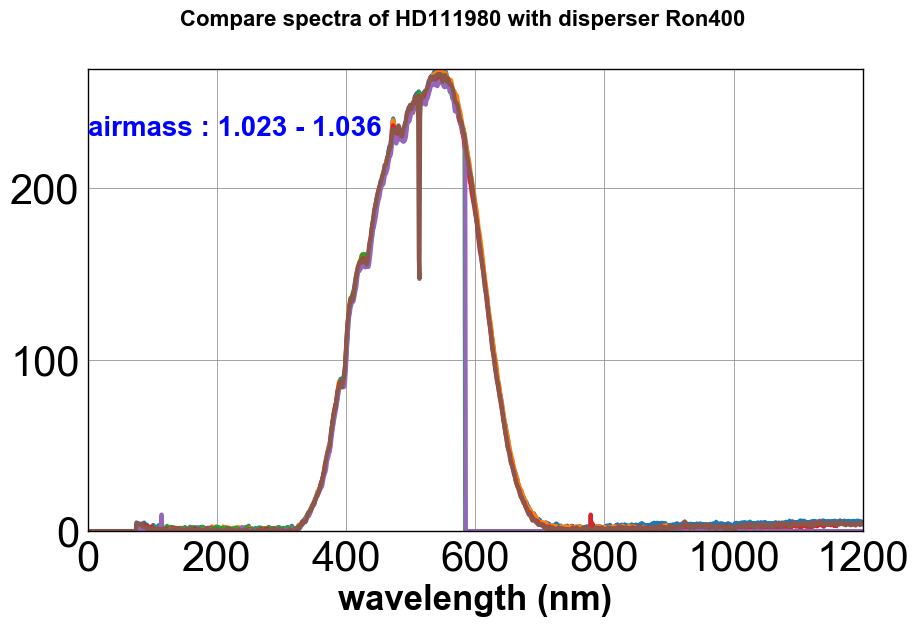

In [24]:
if filt0_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'Ron400',filt0_idx)

In [25]:
if filt1_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'Thor300',filt1_idx)

In [26]:
if filt2_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'HoloPhP',filt2_idx)

In [27]:
if filt3_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'HoloPhAg',filt3_idx)

In [28]:
if filt4_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'HoloAmAg',filt4_idx)

In [29]:
if filt5_idx.shape[0] >0:
    CompareSpectrumProfile(all_wl_right,all_rightspectra,all_titles,object_name,all_filt,dir_top_images,'Ron200',filt5_idx)

# Compute statistical error

In [30]:
print all_elecgain

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [31]:
print all_expo

[60.0, 60.0, 60.0, 60.0, 60.0, 60.0]


In [32]:
def ComputeStatisticalError(all_wl,all_spectra,all_totspectra,all_titles,object_name,all_filt,dir_top_img,figname,gain,expositiontime):
    """
    ComputeStatisticalError : 
    
    """
    NBSPEC=len(all_spectra)
    NBIMGPERROW=2
    MAXIMGROW=max(2,m.ceil(NBSPEC/NBIMGPERROW))
   
    all_stastistical_errors = []    
        
     # fig file specif
    NBIMGROWPERPAGE=5  # number of rows per pages
    PageNum=0          # page counter
    
    figfilename=os.path.join(dir_top_img,figname)
    pp = PdfPages(figfilename) # create a pdf file
    
    title='Calibrated spectra with stat errors for {}'.format(object_name)
         
    
    
    for index in np.arange(0,NBSPEC):
        if index%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
            f, axarr = plt.subplots(NBIMGROWPERPAGE,NBIMGPERROW,figsize=(25,30))
            f.suptitle(title,size=20,fontweight='bold')
 
  


        indexcut=index-PageNum*(NBIMGROWPERPAGE*NBIMGPERROW)    
        ix=indexcut%NBIMGPERROW
        iy=indexcut/NBIMGPERROW
        
        wl=all_wl[index]  # wavelength in data
        
        spectrum=np.array(all_spectra[index])   # data
        totspectrum=np.array(all_totspectra[index])
        staterrors=np.sqrt(totspectrum)/np.sqrt(gain[index]*expositiontime[index])
        
       
        axarr[iy,ix].errorbar(wl,spectrum,yerr=staterrors,fmt='o',color='red',lw=2,label='data') # plot data
        
        
        all_stastistical_errors.append(staterrors)
        
        max_y_to_plot=spectrum[:].max()*1.2
        
        max_y_to_plot=max_y_to_plot*0.15
        
        
        axarr[iy,ix].set_ylim(0.,max_y_to_plot)
        axarr[iy,ix].set_xlim(0.,1200.)
        axarr[iy,ix].text(0.,max_y_to_plot*1.1/1.2, all_filt[index],verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)
       
        axarr[iy,ix].set_title(all_titles[index])
        
        axarr[iy,ix].set_xlabel("wavelength (nm)")
        
        #axarr[iy,ix].get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        #axarr[iy,ix].get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        axarr[iy,ix].grid(b=True, which='major', color='grey', linewidth=0.5)
        #axarr[iy,ix].grid(b=True, which='minor', color='grey', linewidth=0.5)
      
        axarr[iy,ix].legend()
        
        # save a new page
        if (index+1)%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
            PageNum+=1  # increase page Number
            f.savefig(pp, format='pdf')
            f.show()
            
                
          
    
    f.savefig(pp, format='pdf') 
    f.show()
    pp.close()
    return all_stastistical_errors
    
    

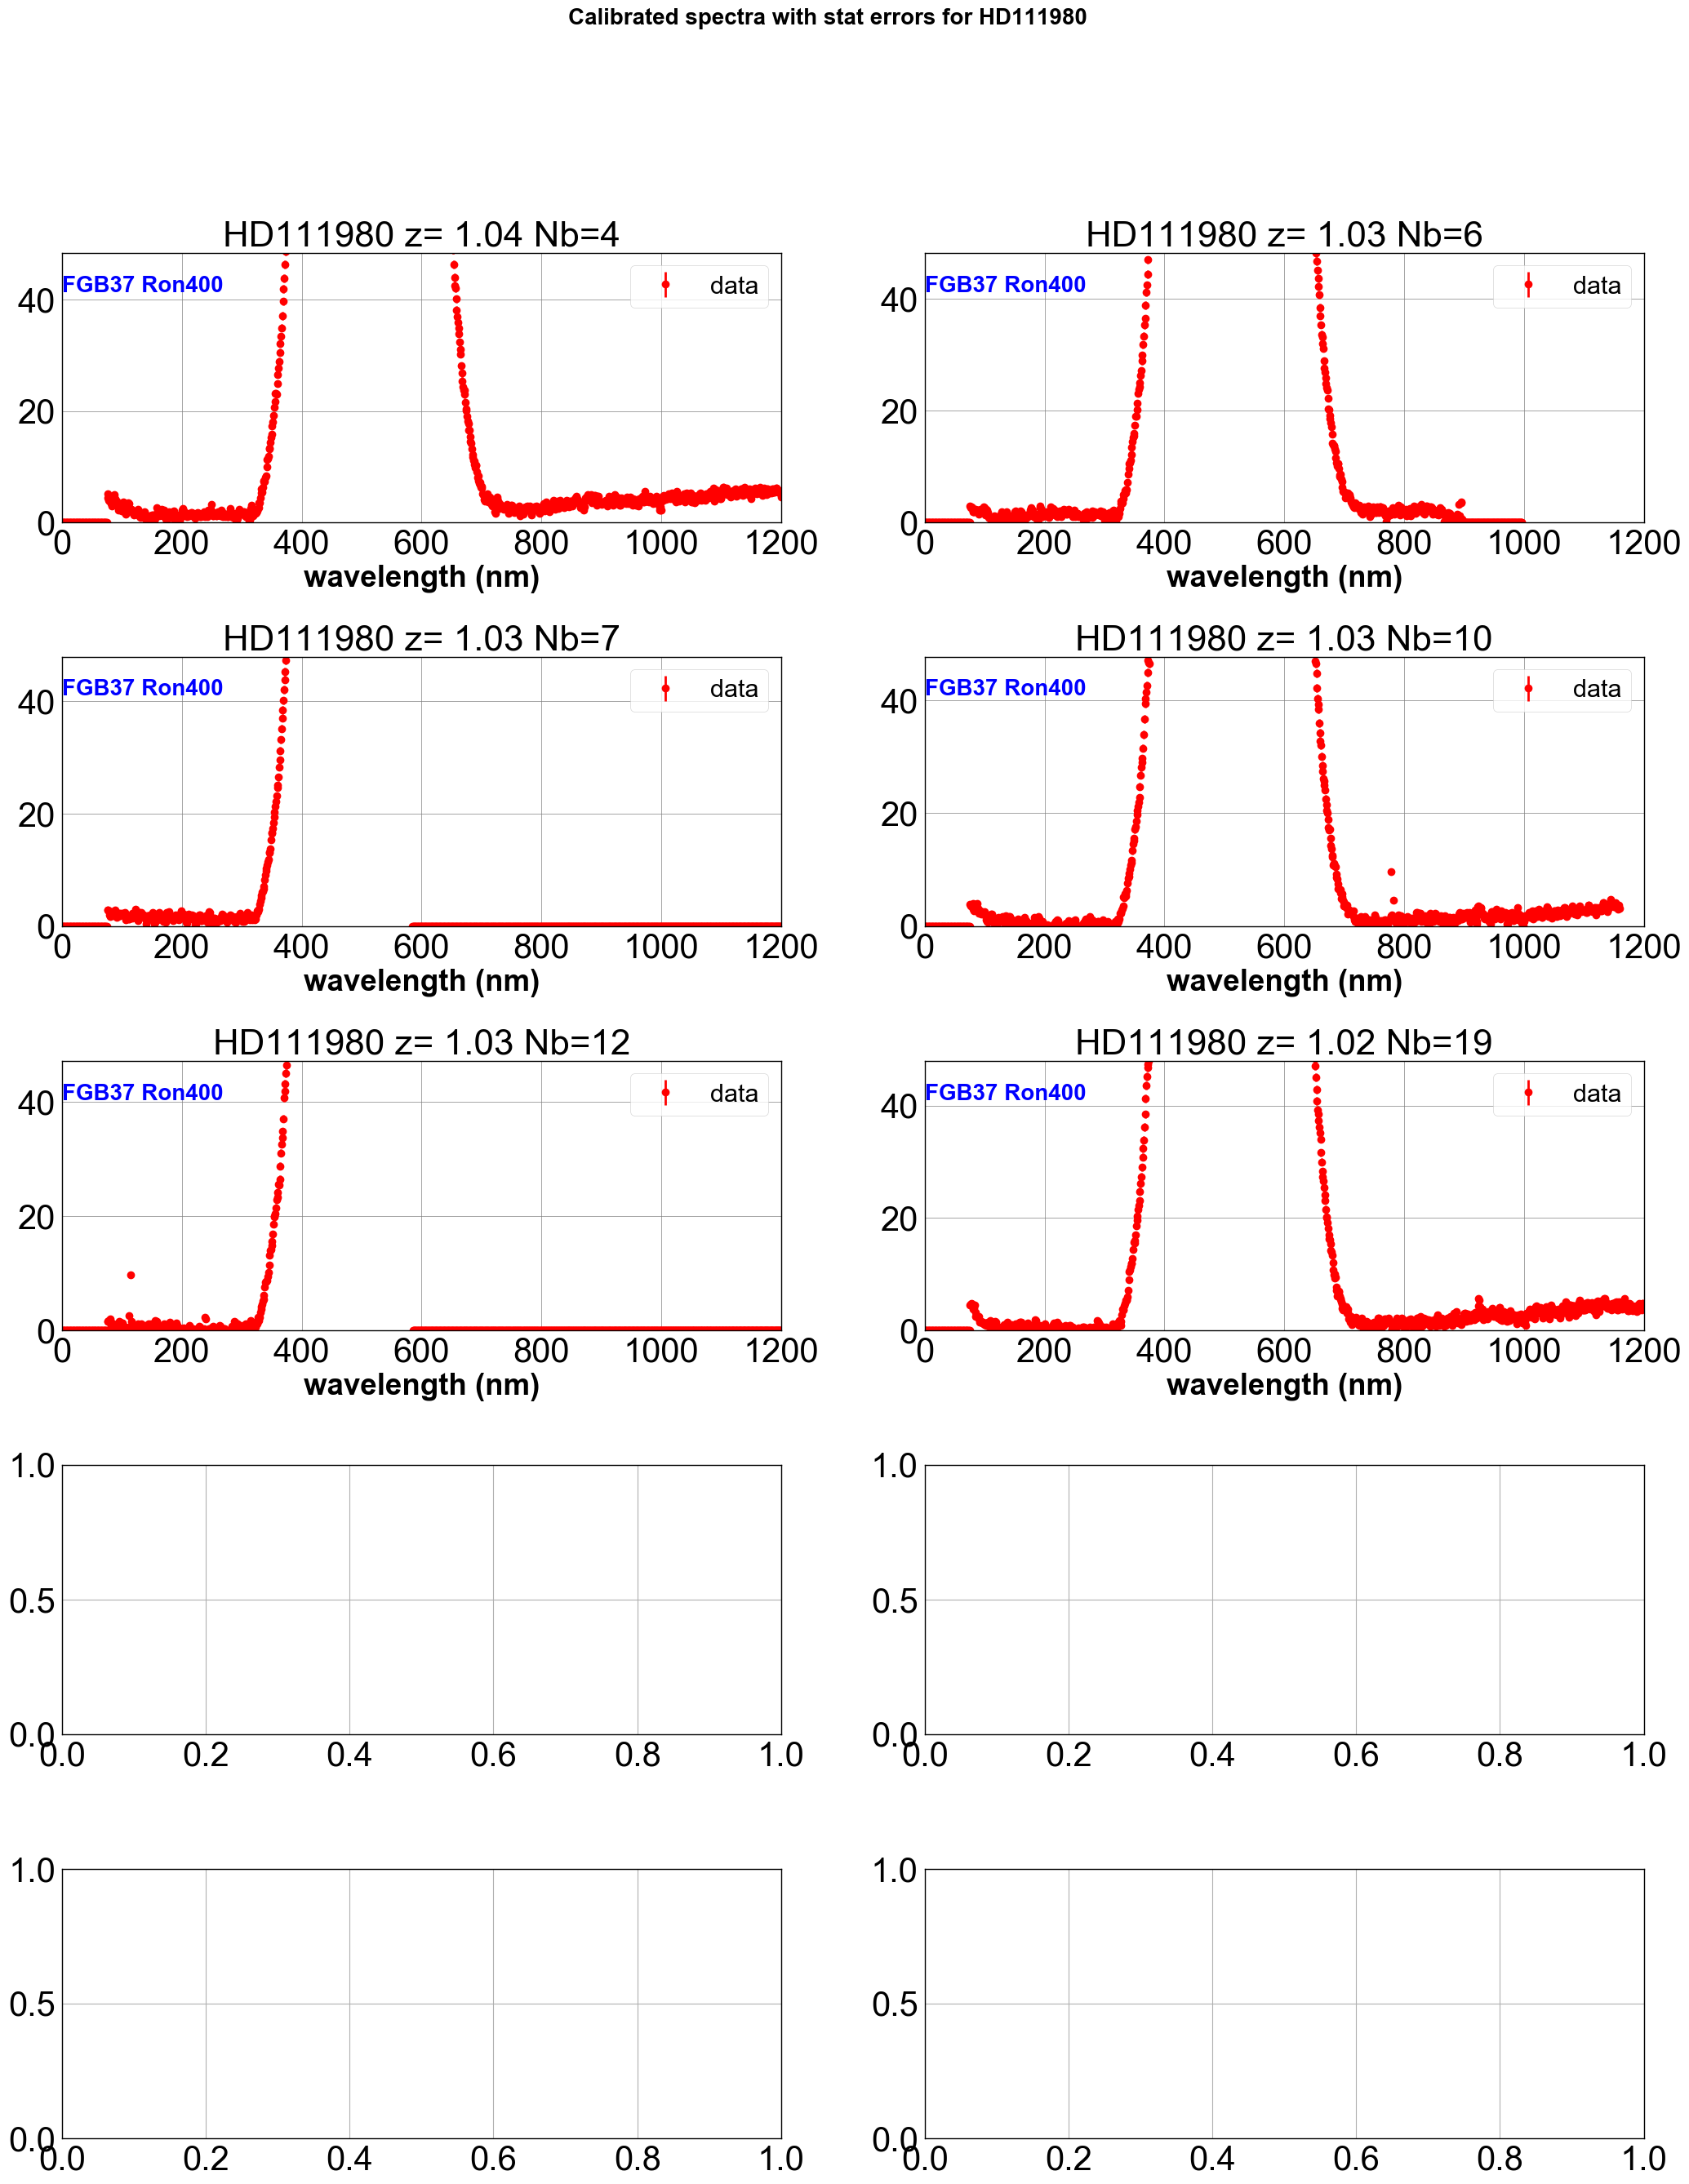

In [33]:
all_rightstastistical_errors=ComputeStatisticalError(all_wl_right,all_rightspectra,all_totrightspectra,all_titles,object_name,all_filt,dir_top_images,'RightSpectraStatErrors.pdf',all_elecgain,all_expo)

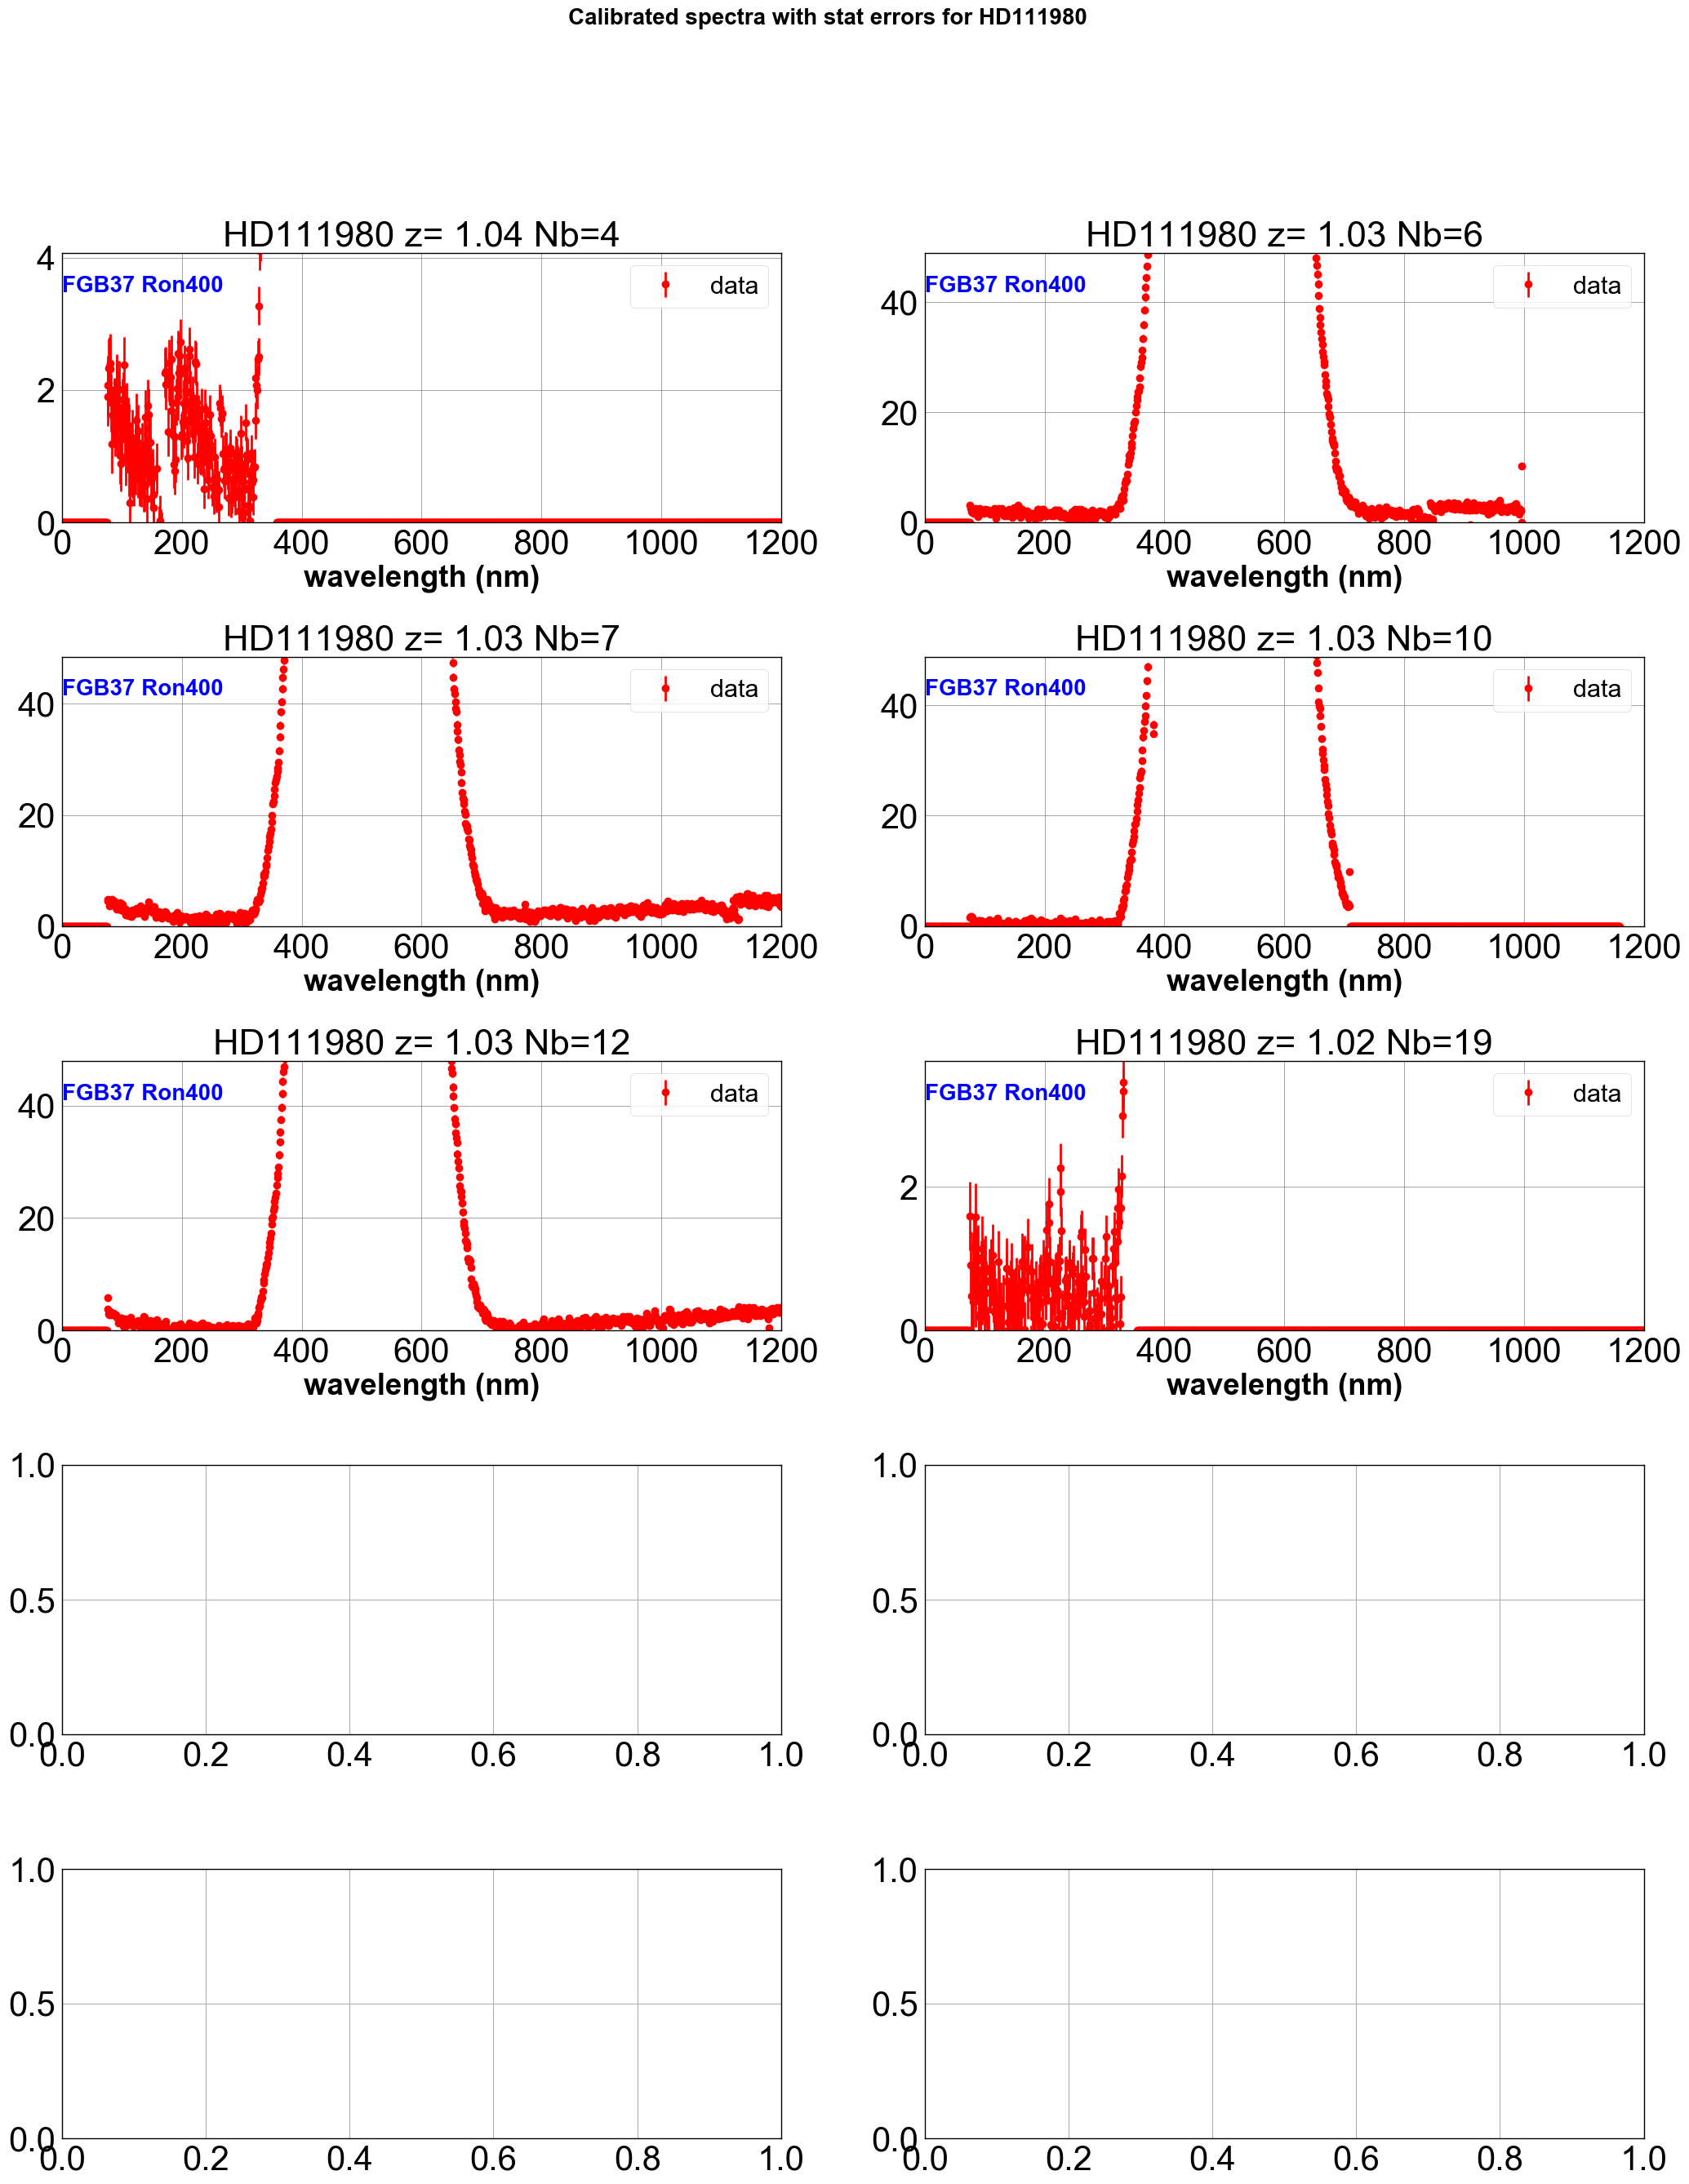

In [34]:
all_leftstastistical_errors=ComputeStatisticalError(all_wl_left,all_leftspectra,all_totleftspectra,all_titles,object_name,all_filt,dir_top_images,'LeftSpectraStatErrors.pdf',all_elecgain,all_expo)

# Save outputfilename
Results of the fits for right and left spectra are saved as images

In [35]:
newfullfilenames=[]
for idx,file in np.ndenumerate(sorted_files):
    short_infilename=file.split("/")[2]
    short_partfilename=re.findall('^finalSpectra_(.*)',short_infilename)
    short_outfilename='calibSpectra_'+short_partfilename[0]
    newfullfilename=os.path.join(outputdir,short_outfilename)
    newfullfilenames.append(newfullfilename)

In [36]:
newfullfilenames[0:5]

['./spectrum_calibspec/calibSpectra_20170609_004.fits',
 './spectrum_calibspec/calibSpectra_20170609_006.fits',
 './spectrum_calibspec/calibSpectra_20170609_007.fits',
 './spectrum_calibspec/calibSpectra_20170609_010.fits',
 './spectrum_calibspec/calibSpectra_20170609_012.fits']

In [37]:
#
#  New fashion to save a binary table outside the primary header
#
for idx,file in np.ndenumerate(newfullfilenames):
    primhdu = fits.PrimaryHDU(header=all_header[idx[0]])   # make an primary HDU without data
    
    col1=fits.Column(name='CalibLeftSpecWL',format='E',array=all_wl_left[idx[0]])
    col2=fits.Column(name='CalibLeftSpec',format='E',array=all_leftspectra[idx[0]])
    col3=fits.Column(name='CalibTotLeftSpec',format='E',array=all_totleftspectra[idx[0]])
    col4=fits.Column(name='CalibRightSpecWL',format='E',array=all_wl_right[idx[0]])
    col5=fits.Column(name='CalibRightSpec',format='E',array=all_rightspectra[idx[0]])
    col6=fits.Column(name='CalibTotRightSpec',format='E',array=all_totrightspectra[idx[0]])
    col7=fits.Column(name='CalibStatErrorLeftSpec',format='E',array=all_leftstastistical_errors[idx[0]])
    col8=fits.Column(name='CalibStatErrorRightSpec',format='E',array=all_rightstastistical_errors[idx[0]])
    cols=fits.ColDefs([col1,col2,col3,col4,col5,col6,col7,col8])
   
    
    tbhdu = fits.BinTableHDU.from_columns(cols)     # new binary table HDU
    thdulist = fits.HDUList([primhdu, tbhdu])
    
    thdulist.writeto(file,overwrite=True)

In [38]:
!ls -l ./spectrum_calibspec

total 720
-rw-r--r--  1 dagoret  staff  66240 Apr 29 13:10 calibSpectra_20170609_004.fits
-rw-r--r--  1 dagoret  staff  48960 Apr 29 13:10 calibSpectra_20170609_006.fits
-rw-r--r--  1 dagoret  staff  57600 Apr 29 13:10 calibSpectra_20170609_007.fits
-rw-r--r--  1 dagoret  staff  54720 Apr 29 13:10 calibSpectra_20170609_010.fits
-rw-r--r--  1 dagoret  staff  57600 Apr 29 13:10 calibSpectra_20170609_012.fits
-rw-r--r--  1 dagoret  staff  66240 Apr 29 13:10 calibSpectra_20170609_019.fits
